In [186]:
%run MCTS.ipynb
%run NNet_architecture.ipynb
%run Deck.ipynb
%run Board.ipynb
import time
from tensorflow.keras.models import load_model

In [187]:
# import cProfile
# cProfile.run('foo()', sort="tottime")

In [188]:
# model = create_model()
model = load_model("models/latest.h5")

### Training

In [189]:
new_board = Board(deck)
root = MonteCarloTreeSearchNode(model, new_board, prior=0)

In [190]:
nb_simulations = 200
nb_games = 5
max_move_per_game = np.inf

In [191]:
node = root
games = [MonteCarloTreeSearchNode(model, Board(deck), prior=0) for i in range(nb_games)]
game = 0
i = 0
board_states = []
values = []
policies = []

while game < nb_games:
    node = games[game]
    i = 0
    while not node.board.is_game_over() and i < max_move_per_game:
        node.simulate(nb_simulations)
        
        l = [(ind, node._number_of_visits) for ind, node in node.children.items()]
        ind, action = max(l, key = lambda x:x[1])
        
        policy = np.zeros(5 * 5 * 52)
        for a, b in node.children.items():
            policy[a] = b.mean_value()
        
        policies.append(policy)
        board_states.append(node.board.board_state)
        values.append(node.mean_value()[0][0])
        
        # nodes.append(node)
        node = node.children[ind]
        
        plt.imshow(node.board.board_2D)
        plt.show()
        i += 1
        print("-----------", i)
    game +=1
    print("---------------------------------", game, "---------------------------------")

0


KeyboardInterrupt: 

In [ ]:
board_states_2 = np.zeros((len(board_states), 5, 5, 10))
policies_2 = np.zeros((len(policies), 5, 5, 52))

In [ ]:
for i, board in enumerate(board_states):
    
    board_states_2[i] = board
    policies_2[i] = policies[i].reshape((5, 5, 52))

In [ ]:
board_states_2.shape

# Fit with games

In [182]:
model.fit(board_states_2, [policies_2, np.array(values)], epochs=5)

Epoch 1/5
3/3 [==============================] - 16s 4s/step - loss: 0.1059 - conv2d_292_loss: 0.0627 - value_head_loss: 0.0433
Epoch 2/5
3/3 [==============================] - 12s 4s/step - loss: 0.1153 - conv2d_292_loss: 0.0750 - value_head_loss: 0.0403
Epoch 3/5
3/3 [==============================] - 12s 4s/step - loss: 0.1318 - conv2d_292_loss: 0.0951 - value_head_loss: 0.0366
Epoch 4/5
3/3 [==============================] - 12s 4s/step - loss: 0.1513 - conv2d_292_loss: 0.1199 - value_head_loss: 0.0315
Epoch 5/5
3/3 [==============================] - 12s 4s/step - loss: 0.1488 - conv2d_292_loss: 0.1114 - value_head_loss: 0.0374


In [183]:
model.save("models/latest.h5")

c:\bib\envs\ml\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


<AxesSubplot:>

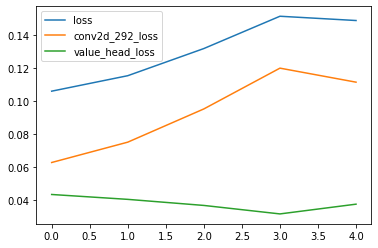

In [184]:
import pandas as pd
pd.DataFrame(model.history.history).plot()